In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import cv2
from sklearn.model_selection import train_test_split 
from keras.utils import to_categorical


In [4]:
#.wav dosyasının pathını alıyor, spectrogram çıktısı veriyor.
def make_spectrogram(file_path):
    data, sampling_rate = librosa.load(file_path)
    out=librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    return out

In [11]:
#.img dosyasını ve küçültme oranını alıyor, yeni ölçüleri NxN şeklinde veriyor.
def resized_dim(img,rate):
    #height = img.shape[0]
    #width = img.shape[1]
    #channels = img.shape[2]
    width=int(img.shape[1])
    height=int(img.shape[0])
    if width>=height:
        width=height*rate/100
        height=height*rate/100
    else:
        height=width*rate/100
        width=width*rate/100
    return int(height),int(width)

In [2]:
path="/Users/ugur/Desktop/UrbansoundProject/UrbanSound8K/"
metadata=pd.read_csv(path+"metadata/UrbanSound8K.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [35]:
fold_number=np.array(metadata["fold"])
file_name=np.array(metadata["slice_file_name"])
class_ID=np.array(metadata["classID"])

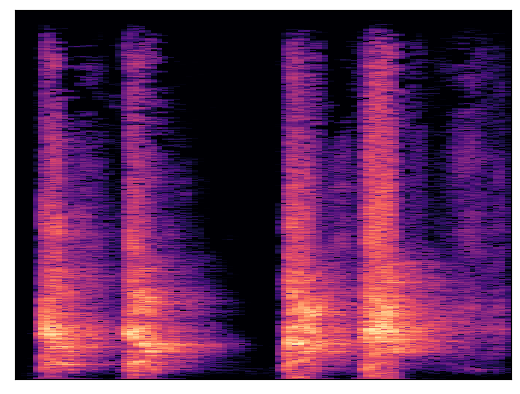

In [5]:
#Test spectrogram
testpath="/Users/ugur/Desktop/UrbansoundProject/UrbanSound8K/audio/fold6/208030-3-0-0.wav"
testim=make_spectrogram(testpath)
librosa.display.specshow(testim)

In [8]:
#Döngü bir yerde problem çıkartıyor, bu yüzden 2 parça halinde spectroglamları kayıt ediyorum.
audio_path=path+"audio"
for i in range(int(len(file_name)/2)):
    file_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i]
    fig=plt.figure()
    librosa.display.specshow(make_spectrogram(file_path))
    fig.savefig(file_path[:-3]+"png")
    plt.close(fig)

/Users/ugur/miniforge3/envs/CondaEnv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


In [9]:
for i in range(int(len(file_name)/2),len(file_name)):
    file_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i]
    fig=plt.figure()
    librosa.display.specshow(make_spectrogram(file_path))
    fig.savefig(file_path[:-3]+"png")
    plt.close(fig)

/Users/ugur/miniforge3/envs/CondaEnv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/Users/ugur/miniforge3/envs/CondaEnv/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


In [10]:
#Eksik spectrogram var mi diye kontrol ediyor.
for i in range(len(file_name)):
    file_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i][:-3]+"png"
    if not os.path.exists(file_path):
        print(f"{file_path[:-3]}Eksik")


Yeni boyut(64, 64)


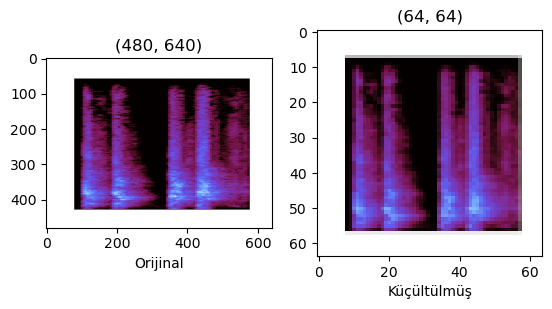

In [27]:
#Test .img,küçültülecek boyut ve karşılaştırma.
test_img = cv2.imread('test.png')
dim=resized_dim(test_img,13.5)
print(f"Yeni boyut{dim}")
resized_test_img=cv2.resize(test_img,dim, interpolation = cv2.INTER_AREA)
Titles =[(test_img.shape[0],test_img.shape[1]),str(dim)]
Label=["Orijinal","Küçültülmüş"]
images=[test_img,resized_test_img]
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.title(Titles[i])
    plt.xlabel(Label[i])
    plt.imshow(images[i])
plt.show()


In [37]:
audio_path=path+"audio"
Vision=[]
for i in range(len(class_ID)):
    image_path=audio_path + "/fold" +str(fold_number[i]) + "/" +file_name[i][:-3]+"png"
    img=cv2.imread(image_path)
    gray_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img=cv2.resize(gray_img,dim, interpolation = cv2.INTER_AREA)
    normalized_img=resized_img/255
    Vision.append(normalized_img)
df=pd.DataFrame({"Vision":Vision,"ClassID":class_ID})
df.head()
df.info

<bound method DataFrame.info of                                                  Vision  ClassID
0     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        3
1     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        2
2     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        2
3     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        2
4     [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        2
...                                                 ...      ...
8727  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        1
8728  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        1
8729  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        1
8730  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        1
8731  [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...        1

[8732 rows x 2 columns]>

In [38]:
X_=df["Vision"]
print(X_.shape)
X=np.empty([len(X_),dim[0],dim[0]])
for i in range(len(X_)):
    X[i]=(X_[i])
X=X.reshape(len(X_),dim[0],dim[0],1)
print(X.shape)


(8732,)
(8732, 64, 64, 1)


In [39]:
Y=df["ClassID"]
print(Y.shape)
Y=to_categorical(Y)
print(Y.shape)

(8732,)
(8732, 10)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
x_val,x_test,y_val,y_test=train_test_split(x_test,y_test,train_size=0.5,random_state=42)

In [42]:
print(f"Length of Xtrain: {len(x_train)}")
print(f"Length of Xtest: {len(x_test)}")
print(f"Length of Xvalidation: {len(x_val)}")
print(f"Length of Ytrain: {len(y_train)}")
print(f"Length of Ytest: {len(y_test)}")
print(f"Length of Yvalidation: {len(y_val)}")

Length of Xtrain: 6985
Length of Xtest: 874
Length of Xvalidation: 873
Length of Ytrain: 6985
Length of Ytest: 874
Length of Yvalidation: 873


In [43]:
np.save("x_validation",x_val)
np.save("x_train",x_train)
np.save("x_test",x_test)
np.save("y_validation",y_val)
np.save("y_train",y_train)
np.save("y_test",y_test)